(10, 15) (10, 15) (10, 15)


Text(0.5, 0, 'time')

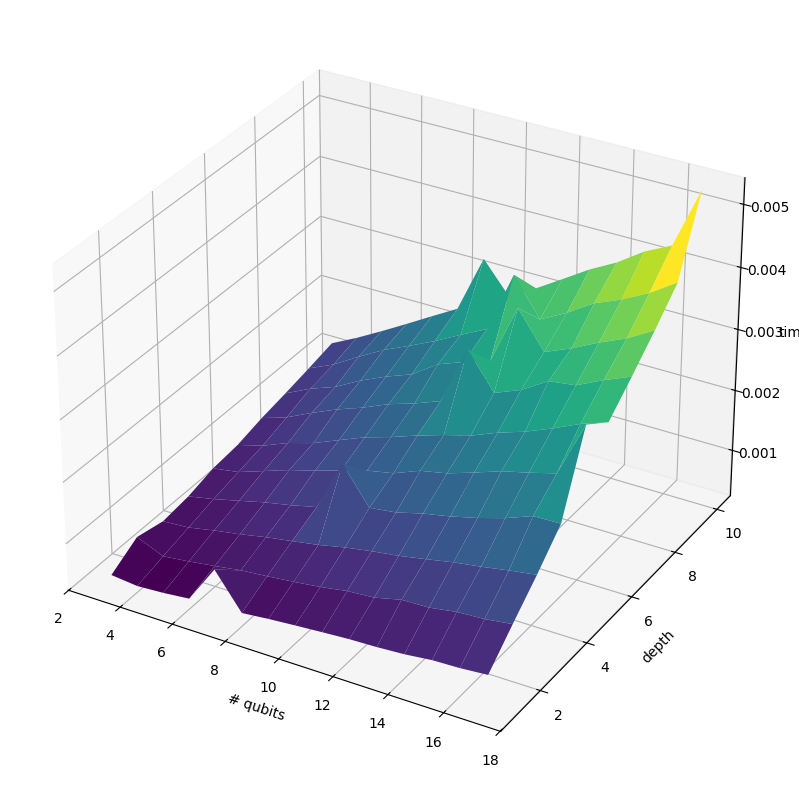

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
t = 0
# Create a figure object
fig = plt.figure(figsize=(20, 10))

# # Create 4x2 subplots
# axes = []
# for i in range(1, 4):
#     ax = fig.add_subplot(1, 4, i, projection='3d')
#     axes.append(ax)
package = 'Qiskit'
server = 'cad114'
depths = list(range(1, 11))
num_qubits = list(range(3, 18))
times = []


for depth in depths:
    time = np.loadtxt(f"./time/qrc/QRC_{package}_{server}_depth{depth}_Time.txt")
    times.append(time)
times = np.array(times)
num_qubits, depths = np.meshgrid(num_qubits, depths)
print(depths.shape, num_qubits.shape, times.shape)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(num_qubits, depths, times, cmap='viridis')
ax.set_xlabel('# qubits')
ax.set_ylabel('depth')
ax.set_zlabel('time')
# for i, depth in enumerate(depths):
#     ax.scatter(depths, num_qubits, times, marker = 'o')
#     ax.plot3D(depths, num_qubits, times)

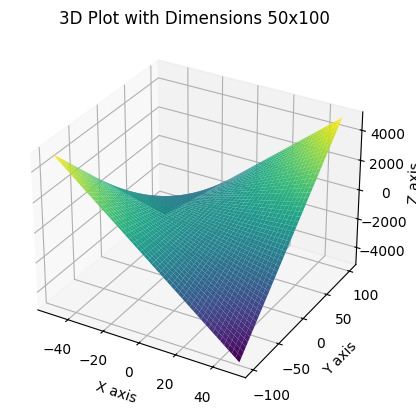

(100, 50) (100, 50) (100, 50)


In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

num_qubits = range(3, 18)
depths = range(1, 11)

packages = ['Qsun', 'Qiskit', 'ProjectQ', 'Pennylane']
timess = np.zeros((len(num_qubits), len(depths), len(packages)))
for i, package in enumerate(packages):
    for depth in depths:
        time = np.loadtxt(f'./time/qrc/{times}/QRC_{package}_cad114_depth{depth}_Time.txt', dtype=float)
        timess[:, depth-1, i] = time

fig, axs = plt.subplots(4, figsize=(20, 5))
for i, package in enumerate(packages):
    X, Y = np.meshgrid(num_qubits, depths)
    # Plot the heatmap
    plt.imshow(num_gatess, cmap='hot', origin='lower', extent = [1, 10, 3, 17])
    plt.yticks(num_qubits)
    plt.xticks(depths)
    plt.xlabel('Depth')
    plt.ylabel('# Qubits')

    cbar = plt.colorbar()
    cbar.set_label('# Gate')  # Label for the colorbar

0 0
0 1
1 0
1 1
2 0
2 1


AttributeError: module 'matplotlib.pyplot' has no attribute 'aspect'

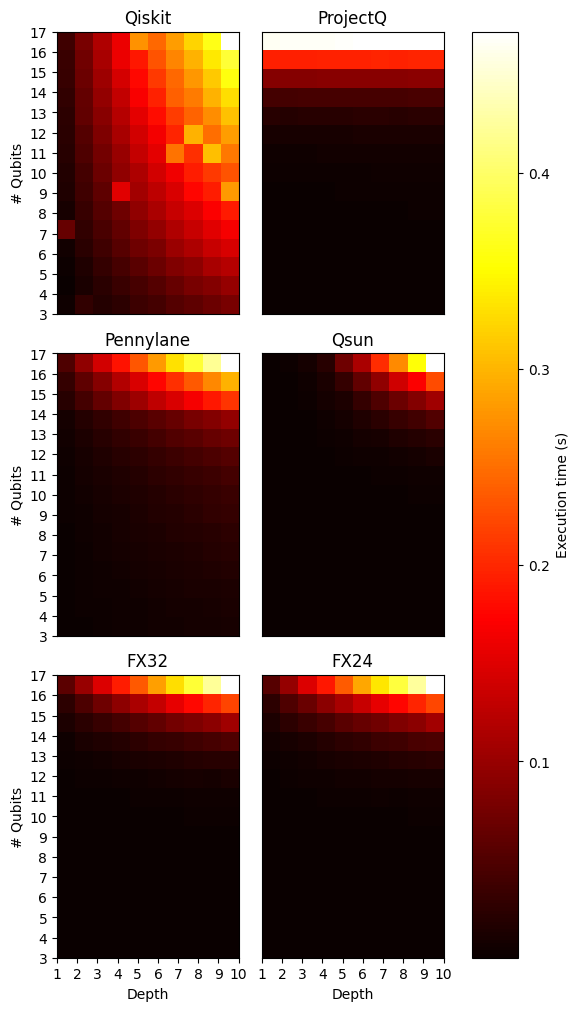

In [2]:
import numpy as np

import matplotlib.pyplot as plt

num_qubits = range(3, 18)
depths = range(1, 11)

packages = ['Qiskit', 'ProjectQ', 'Pennylane', 'Qsun', 'FX32', 'FX24']
timess = np.zeros((len(num_qubits), len(depths), len(packages)))
for i, package in enumerate(packages):
    for depth in depths:
        if package in ['FX32', 'FX24']:
            time = np.loadtxt(f'./time/FPGA_QRC/{package}/time/{package}_{depth}_Time.txt', dtype=float)
        else:
            time = np.loadtxt(f'./time/qrc/QRC_{package}_cad114_depth{depth}_Time.txt', dtype=float)
        timess[:, depth-1, i] = time

fig, axs = plt.subplots(3,2, figsize=(10, 10), layout='compressed')

for i, package in enumerate(packages):
    print(i // 2, i % 2)
    ax = axs[i // 2, i % 2]
    X, Y = np.meshgrid(num_qubits, depths)
    heatmap = ax.imshow(timess[:, :, i], cmap='hot', origin='lower', extent=[1, 10, 3, 17])

    ax.set_title(package)
    ax.set_xticks(depths)
    ax.set_yticks(num_qubits)
    if i in [0, 2, 4]:
        ax.set_ylabel('# Qubits')
    if i in [1, 3, 5]:
        ax.set_yticks([])
    if i in [0,1,2,3]:
        ax.set_xticks([])
    if i in [4,5]:
        ax.set_xlabel('Depth')
fig.colorbar(heatmap, ax=axs, label='Execution time (s)', location='right')
# fig.colorbar(heatmap,label='# Gate')
# plt.tight_layout()
plt.aspect(aspect=0.5)
plt.savefig('time.svg')
plt.show()

(6, 15)


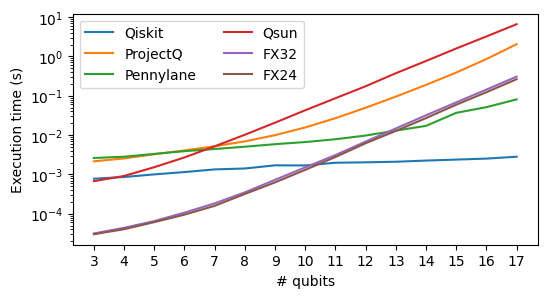

In [68]:
import numpy as np

import matplotlib.pyplot as plt

num_qubits = range(3, 18)
depths = range(1, 11)

packages = ['Qiskit', 'ProjectQ', 'Pennylane', 'Qsun', 'FX32', 'FX24']
timess = np.zeros((len(num_qubits), len(depths), len(packages)))
plt.figure(figsize=(6, 3))
for i, package in enumerate(packages):
    for depth in depths:
        if package in ['FX32', 'FX24']:
            time = np.loadtxt(f'./time/FPGA_QRC/{package}/time/{package}_{depth}_Time.txt', dtype=float)
        else:
            time = np.loadtxt(f'./time/qrc/QRC_{package}_cad114_depth{depth}_Time.txt', dtype=float)
        timess[:, depth-1, i] = time

timess = np.transpose(np.mean(timess, axis = 1))
print(timess.shape)
for i, package in enumerate(packages):
    plt.plot(num_qubits, timess[i], label=package)
plt.xticks(num_qubits)
plt.xlabel('# qubits')
plt.ylabel('Execution time (s)') 
plt.yscale('log')
plt.legend(ncol=2)
plt.show()